In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [44]:
Label_data = pd.read_csv("...../Play_Data.csv")

In [45]:
Label_data

,ID,Date,Outlook,Temperature,Humidity,Windy,Decision
0,1,9/1/2017,Sunny,Hot,High,False,No
1,2,9/8/2017,Sunny,Hot,High,True,No
2,3,9/15/2017,Overcast,Hot,High,False,Yes
3,4,9/22/2017,Rainy,Mild,High,False,Yes
4,5,9/29/2017,Rainy,Cool,Normal,False,Yes
5,6,10/1/2017,Rainy,Cool,Normal,True,No
6,7,10/8/2017,Overcast,Cool,Normal,True,Yes
7,8,10/15/2017,Sunny,Mild,High,False,No
8,9,10/22/2017,Sunny,Cool,Normal,False,Yes
9,10,10/29/2017,Rainy,Mild,Normal,False,Yes


In [4]:
Label_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 7 columns):
ID             15 non-null int64
Date           15 non-null object
Outlook        15 non-null object
Temperature    15 non-null object
Humidity       15 non-null object
Windy          15 non-null bool
Decision       15 non-null object
dtypes: bool(1), int64(1), object(5)
memory usage: 863.0+ bytes


In [5]:
Label_data['Decision'],class_names = pd.factorize(Label_data['Decision'])

In [6]:
print(class_names)

Index(['No', 'Yes'], dtype='object')


In [7]:
print(Label_data['Decision'].unique())

[0 1]


In [8]:
Label_data['Outlook'],_ = pd.factorize(Label_data['Outlook'])

In [9]:
Label_data['Temperature'],_ = pd.factorize(Label_data['Temperature'])

In [10]:
Label_data['Humidity'],_ = pd.factorize(Label_data['Humidity'])

In [11]:
Label_data['Windy'],_ = pd.factorize(Label_data['Windy'])

In [12]:
Label_data

,ID,Date,Outlook,Temperature,Humidity,Windy,Decision
0,1,9/1/2017,0,0,0,0,0
1,2,9/8/2017,0,0,0,1,0
2,3,9/15/2017,1,0,0,0,1
3,4,9/22/2017,2,1,0,0,1
4,5,9/29/2017,2,2,1,0,1
5,6,10/1/2017,2,2,1,1,0
6,7,10/8/2017,1,2,1,1,1
7,8,10/15/2017,0,1,0,0,0
8,9,10/22/2017,0,2,1,0,1
9,10,10/29/2017,2,1,1,0,1


In [13]:
Label_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 7 columns):
ID             15 non-null int64
Date           15 non-null object
Outlook        15 non-null int64
Temperature    15 non-null int64
Humidity       15 non-null int64
Windy          15 non-null int64
Decision       15 non-null int64
dtypes: int64(6), object(1)
memory usage: 968.0+ bytes


In [14]:
X = Label_data.iloc[:,2:6]
y = Label_data.iloc[:,-1]

In [15]:
X

,Outlook,Temperature,Humidity,Windy
0,0,0,0,0
1,0,0,0,1
2,1,0,0,0
3,2,1,0,0
4,2,2,1,0
5,2,2,1,1
6,1,2,1,1
7,0,1,0,0
8,0,2,1,0
9,2,1,1,0


In [16]:
y

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
14    1
Name: Decision, dtype: int64

In [17]:
train_dist = int(0.9 * len(X))
X_train, X_test = X[:train_dist], X[train_dist:]
y_train, y_test = y[:train_dist], y[train_dist:]

In [18]:
X_train

,Outlook,Temperature,Humidity,Windy
0,0,0,0,0
1,0,0,0,1
2,1,0,0,0
3,2,1,0,0
4,2,2,1,0
5,2,2,1,1
6,1,2,1,1
7,0,1,0,0
8,0,2,1,0
9,2,1,1,0


In [19]:
X_test

,Outlook,Temperature,Humidity,Windy
13,2,1,0,1
14,2,0,0,0


In [20]:
y_train

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
Name: Decision, dtype: int64

In [21]:
y_test

13    0
14    1
Name: Decision, dtype: int64

# ID3: information gain (a.k.a., entropy based gain)

In [22]:
entropy_dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [23]:
entropy_dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [24]:
entropy_y_pred = entropy_dtree.predict(X_test)

In [25]:
entropy_y_pred

array([1, 1], dtype=int64)

In [26]:
entropy_count_misclassified = (y_test != entropy_y_pred).sum()
print('Misclassified samples: {}'.format(entropy_count_misclassified))

Misclassified samples: 1


In [27]:
entropy_accuracy = metrics.accuracy_score(y_test, entropy_y_pred)
print('Accuracy: {:.2f}'.format(entropy_accuracy))

Accuracy: 0.50


[Text(133.92000000000002, 195.696, 'X[0] <= 0.5\nentropy = 0.89\nsamples = 13\nvalue = [4, 9]'),
 Text(66.96000000000001, 152.208, 'X[2] <= 0.5\nentropy = 0.971\nsamples = 5\nvalue = [3, 2]'),
 Text(33.480000000000004, 108.72, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(100.44000000000001, 108.72, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(200.88000000000002, 152.208, 'X[1] <= 1.5\nentropy = 0.544\nsamples = 8\nvalue = [1, 7]'),
 Text(167.40000000000003, 108.72, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(234.36, 108.72, 'X[3] <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(200.88000000000002, 65.232, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(267.84000000000003, 65.232, 'X[0] <= 1.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(234.36, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(301.32000000000005, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]')]

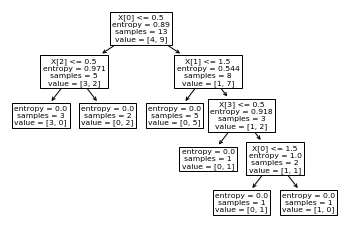

In [28]:
tree.plot_tree(entropy_dtree.fit(X_train, y_train))

In [30]:
print(confusion_matrix(y_test, entropy_y_pred))
print(classification_report(y_test, entropy_y_pred))

[[0 1]
 [0 1]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



# CART: gini index

In [31]:
gini_dtree = tree.DecisionTreeClassifier(criterion='gini', max_depth=3)

In [32]:
gini_dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [33]:
gini_y_pred = gini_dtree.predict(X_test)

In [34]:
gini_y_pred

array([0, 1], dtype=int64)

In [35]:
gini_count_misclassified = (y_test != gini_y_pred).sum()
print('Misclassified samples: {}'.format(gini_count_misclassified))

Misclassified samples: 0


In [36]:
gini_accuracy = metrics.accuracy_score(y_test, gini_y_pred)
print('Accuracy: {:.2f}'.format(gini_accuracy))

Accuracy: 1.00


[Text(148.8, 190.26, 'X[0] <= 0.5\ngini = 0.426\nsamples = 13\nvalue = [4, 9]'),
 Text(74.4, 135.9, 'X[2] <= 0.5\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(37.2, 81.53999999999999, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(111.60000000000001, 81.53999999999999, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(223.20000000000002, 135.9, 'X[1] <= 1.5\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(186.0, 81.53999999999999, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(260.40000000000003, 81.53999999999999, 'X[3] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(223.20000000000002, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(297.6, 27.180000000000007, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]')]

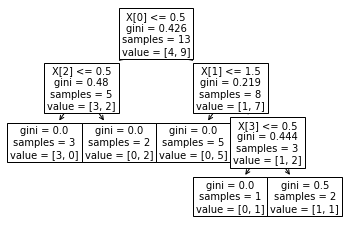

In [37]:
tree.plot_tree(gini_dtree.fit(X_train, y_train))

In [38]:
print(confusion_matrix(y_test, gini_y_pred))
print(classification_report(y_test, gini_y_pred))

[[1 0]
 [0 1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



# C4.5: gain ratio

In [39]:
pip install chefboost

Note: you may need to restart the kernel to use updated packages.


In [40]:
from chefboost import Chefboost as ch

In [46]:
config = {'algorithm':'C4.5'}

In [47]:
Model_data = Label_data.iloc[:,2:7]

In [48]:
Model_data

,Outlook,Temperature,Humidity,Windy,Decision
0,Sunny,Hot,High,False,No
1,Sunny,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Rainy,Mild,High,False,Yes
4,Rainy,Cool,Normal,False,Yes
5,Rainy,Cool,Normal,True,No
6,Overcast,Cool,Normal,True,Yes
7,Sunny,Mild,High,False,No
8,Sunny,Cool,Normal,False,Yes
9,Rainy,Mild,Normal,False,Yes


In [49]:
c45_model = ch.fit(Model_data,config)

C4.5  tree is going to be built...
Accuracy:  100.0 % on  15  instances
finished in  0.23038935661315918  seconds
